In [3]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN

filename = "C:\\Users\\simon\\OneDrive\\Escritorio\\Coding_dojp\\Datos\\Europe Hotel Booking Satisfaction Score.csv"

df = pd.read_csv(filename)

## Introduction:

The dataset contains information on hotels in Europe, with a target column reflecting customer satisfaction or dissatisfaction. 

The dataset consists of 103,904 rows and 17 columns, with both ordinal and numeric object data. The target variable is balanced and does not contain any duplicate or NaN data. 

The numerical columns are ordinal, represented on a scale from 0 to 5, with 0 being the worst and 5 being the best.

| Column Name            | Description                                                                                                                                                                                                                                                                                                                           | Range/Values                                                   |
|------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------|
| Age                    | Age of the traveler                                                                                                                                                                                                                                                                                                                   | 7 to 85                                                        |
| Purpose of Travel      | Reason for the travel                                                                                                                                                                                                                                                                                                                 | aviation, academic, personal, business, tourism               |
| Type of Travel         | Type of travel                                                                                                                                                                                                                                                                                                                         | Group travel, Personal Travel                                   |
| Type of Booking        | Type of booking made                                                                                                                                                                                                                                                                                                                   | Group bookings, Single/Couple                                  |
| Hotel wifi service     | Ratings given by the traveler on the quality of wifi service provided by the hotel                                                                                                                                                                                                                                                     | Ratings out of 5                                                |
| Departure/Arrival convenience | Ratings given by the traveler on the convenience of departure/arrival time                                                                                                                                                                                                                                                              | Ratings out of 5                                                |
| Ease of Online Booking  | Ratings given by the traveler on the ease of booking online                                                                                                                                                                                                                                                                             | Ratings out of 5                                                |
| Hotel Location         | Ratings given by the traveler on the location of the hotel                                                                                                                                                                                                                                                                             | Ratings out of 5                                                |
| Food and Drink         | Ratings given by the traveler on the quality of food and drink provided by the hotel                                                                                                                                                                                                                                                    | Ratings out of 5                                                |
| Stay Comfort           | Ratings given by the traveler on the comfort of the stay                                                                                                                                                                                                                                                                                | Ratings out of 5                                                |
| Common Room Entertainment | Ratings given by the traveler on the availability and quality of entertainment in the common room                                                                                                                                                                                                                                     | Ratings out of 5                                                |
| Check-in/Check-out Service | Ratings given by the traveler on the quality of the check-in/check-out service provided by the hotel                                                                                                                                                                                                                                   | Ratings out of 5                                                |
| Other Service          | Ratings given by the traveler on any other services provided by the hotel                                                                                                                                                                                                                                                              | Ratings out of 5                                                |

## Goal:

to be able to find if there is a customer segmentation through the information delivered in the data frame

In [4]:
#Row deletion

df = df.drop(columns = ["id", "Other service"])#"Id" column removed for not influencing the target
                                               #Column "service" removed for nnot knowing what kind of service

In [5]:
#Evaluate "Type of booking" column 
#There is data "Not defined"

filtro = df["Type Of Booking"] == 'Not defined'
df_filtro = df.loc[filtro, :]

df_filtro

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction
0,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,neutral or dissatisfied
11,Female,12,tourism,Personal Travel,Not defined,2,4,2,2,1,1,1,5,1,neutral or dissatisfied
27,Female,49,business,Group Travel,Not defined,4,4,4,4,2,1,4,2,2,satisfied
37,Male,40,personal,Personal Travel,Not defined,4,3,4,2,2,2,2,3,2,neutral or dissatisfied
69,Female,38,personal,Group Travel,Not defined,4,4,4,4,4,4,4,1,4,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103811,Male,27,personal,Group Travel,Not defined,4,4,4,4,4,4,4,3,4,neutral or dissatisfied
103867,Male,30,personal,Group Travel,Not defined,3,2,2,2,3,3,3,2,3,neutral or dissatisfied
103868,Female,57,personal,Personal Travel,Not defined,1,5,1,5,4,3,5,1,1,neutral or dissatisfied
103877,Male,27,tourism,Group Travel,Not defined,5,4,4,4,5,5,5,2,5,satisfied


In [6]:
#Display the filtered column                
print(df["Type Of Booking"].value_counts())
print(df["Type Of Booking"].value_counts(normalize= True))

#Reprecents 7.2 % of the Df
#We will remove the all the rows filtered. Is less  than 10%

Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64
Group bookings       0.477989
Individual/Couple    0.449886
Not defined          0.072124
Name: Type Of Booking, dtype: float64


In [7]:
#Deletion of rows
filas_eliminadas = df.index[df["Type Of Booking"] == "Not defined"].tolist()
df = df.drop(filas_eliminadas)
df = df.reset_index(drop = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96410 entries, 0 to 96409
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          96410 non-null  object
 1   Age                             96410 non-null  int64 
 2   purpose_of_travel               96410 non-null  object
 3   Type of Travel                  96410 non-null  object
 4   Type Of Booking                 96410 non-null  object
 5   Hotel wifi service              96410 non-null  int64 
 6   Departure/Arrival  convenience  96410 non-null  int64 
 7   Ease of Online booking          96410 non-null  int64 
 8   Hotel location                  96410 non-null  int64 
 9   Food and drink                  96410 non-null  int64 
 10  Stay comfort                    96410 non-null  int64 
 11  Common Room entertainment       96410 non-null  int64 
 12  Checkin/Checkout service        96410 non-null

In [8]:
df_2 = df #New Df clean

In [9]:
df_2

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction
0,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,1,neutral or dissatisfied
1,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,5,satisfied
2,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,2,neutral or dissatisfied
3,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,satisfied
4,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,1,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96405,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,2,neutral or dissatisfied
96406,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,4,satisfied
96407,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,4,neutral or dissatisfied
96408,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,1,neutral or dissatisfied


In [10]:
#Name od fe columns
columnas = df_2.columns.tolist()
columnas

['Gender',
 'Age',
 'purpose_of_travel',
 'Type of Travel',
 'Type Of Booking',
 'Hotel wifi service',
 'Departure/Arrival  convenience',
 'Ease of Online booking',
 'Hotel location',
 'Food and drink',
 'Stay comfort',
 'Common Room entertainment',
 'Checkin/Checkout service',
 'Cleanliness',
 'satisfaction']

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96410 entries, 0 to 96409
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          96410 non-null  object
 1   Age                             96410 non-null  int64 
 2   purpose_of_travel               96410 non-null  object
 3   Type of Travel                  96410 non-null  object
 4   Type Of Booking                 96410 non-null  object
 5   Hotel wifi service              96410 non-null  int64 
 6   Departure/Arrival  convenience  96410 non-null  int64 
 7   Ease of Online booking          96410 non-null  int64 
 8   Hotel location                  96410 non-null  int64 
 9   Food and drink                  96410 non-null  int64 
 10  Stay comfort                    96410 non-null  int64 
 11  Common Room entertainment       96410 non-null  int64 
 12  Checkin/Checkout service        96410 non-null

In [12]:
#Divide the data frame into numeric and object columns

numeric_columns = ['Age','Hotel wifi service',
 'Departure/Arrival  convenience',
 'Ease of Online booking',
 'Hotel location',
 'Food and drink',
 'Stay comfort',
 'Common Room entertainment',
 'Checkin/Checkout service',
 'Cleanliness',]

object_columns = ["Gender","purpose_of_travel","Type of Travel", "Type Of Booking", "satisfaction"]

We separate the columns into numeric and object to be able to scale the data. The way to scale will be Ohe and StandarScaler. in this way we can use the new df to evaluate the Kmean model

In [13]:
#Scale and transform the columns
transformador = ColumnTransformer(
    transformers=[
        ('sescalar', StandardScaler(), numeric_columns),
        ('codificar', OneHotEncoder(), object_columns)
    ])

In [14]:
#Create de df
df_transformado = transformador.fit_transform(df)
df_t = pd.DataFrame(df_transformado)
df_t

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.963004,0.205345,-0.685996,0.168280,0.017499,-1.664026,-1.869359,-1.785826,-1.849127,-1.755989,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.896296,-0.546033,-0.685996,-0.545610,-0.763937,1.350093,1.171154,1.221904,0.535197,1.299972,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.963004,-0.546033,1.277591,1.596061,1.580373,-0.910496,-1.109230,-1.033894,-1.849127,-0.991999,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.438490,0.205345,-0.031467,0.168280,0.017499,0.596563,1.171154,-0.281961,-0.259578,-0.228008,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.896296,0.205345,0.623062,-0.545610,-1.545374,-1.664026,-1.869359,-1.785826,0.535197,-1.755989,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96405,-1.096420,-0.546033,-1.340526,-0.545610,0.017499,-0.910496,-1.109230,-1.033894,-1.054352,-0.991999,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
96406,0.637992,0.956723,0.623062,0.882170,0.798936,-0.910496,1.171154,1.221904,1.329972,0.535982,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
96407,-0.629463,-1.297412,-1.340526,-1.259501,0.017499,0.596563,1.171154,0.469972,1.329972,0.535982,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
96408,-1.163128,-1.297412,-1.340526,-1.259501,1.580373,-1.664026,-1.869359,-1.785826,1.329972,-1.755989,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

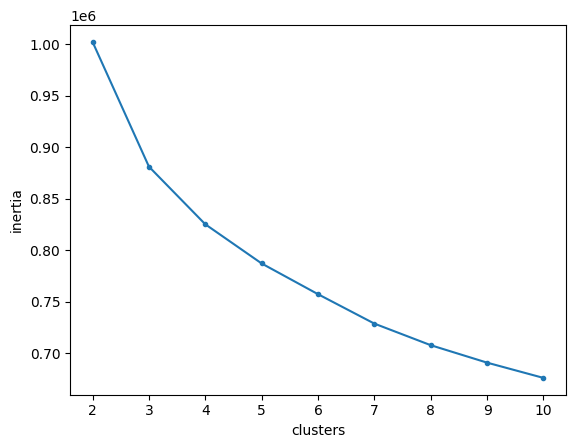

In [15]:
#Create a list for inertia
inertias = []
#loop through k values between 2 and 10, then save them to the inert list.
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(df_t)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters');
plt.ylabel('inertia');

With the elbow method, it is not very clear where the intra-cluster variance decline will flatten out significantly, forming a "elbow curve". The number of clusters corresponding to that point is considered as a good candidate for the optimal number of clusters.

that is why we evaluate with the silhouette method

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

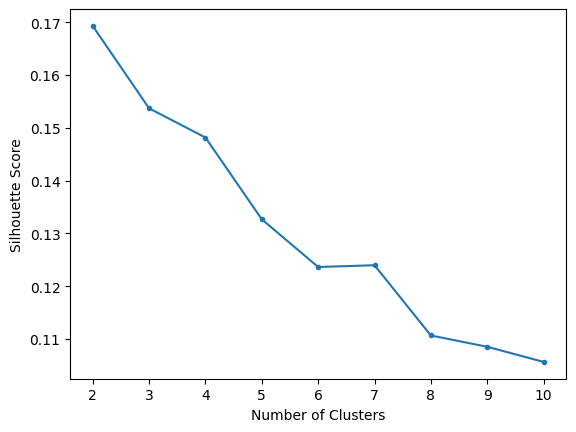

In [16]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_t)
  silhouette_scores.append(silhouette_score(df_t, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

A silhouette score of 0.17 for a K-means algorithm with 2 clusters indicates that the separation between the clusters is not very clear. The silhouette score varies between -1 and 1, where values close to 1 indicate a good separation between the clusters, and values close to -1 indicate that the instances may have been assigned to the wrong cluster.

a score of 0.17 suggests that the separation between the clusters is not very pronounced. This may indicate that the clusters overlap or that there is not a clear separation of the data into distinct groups.

In [17]:
#Create the Kmeans model with a cluster of 2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_t)
# Add the clusters to the df
df_2['cluster'] = kmeans.labels_
df_2.head()

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction,cluster
0,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,1,neutral or dissatisfied,1
1,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,5,satisfied,0
2,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,2,neutral or dissatisfied,1
3,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,satisfied,0
4,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,1,neutral or dissatisfied,1


In [18]:
# We group the df by cluster and by their averages
# we add the as_index = False so that the cluster is a column
cluster_groups = df_2.groupby('cluster', as_index=False).mean().round(1)
cluster_groups

C:\Users\simon\AppData\Local\Temp\ipykernel_5688\3946848291.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_groups = df_2.groupby('cluster', as_index=False).mean().round(1)


,cluster,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness
0,0,41.2,3.0,3.1,2.9,3.0,3.9,4.2,4.2,3.6,4.1
1,1,36.9,2.4,3.0,2.6,3.0,2.2,2.4,2.2,2.9,2.2


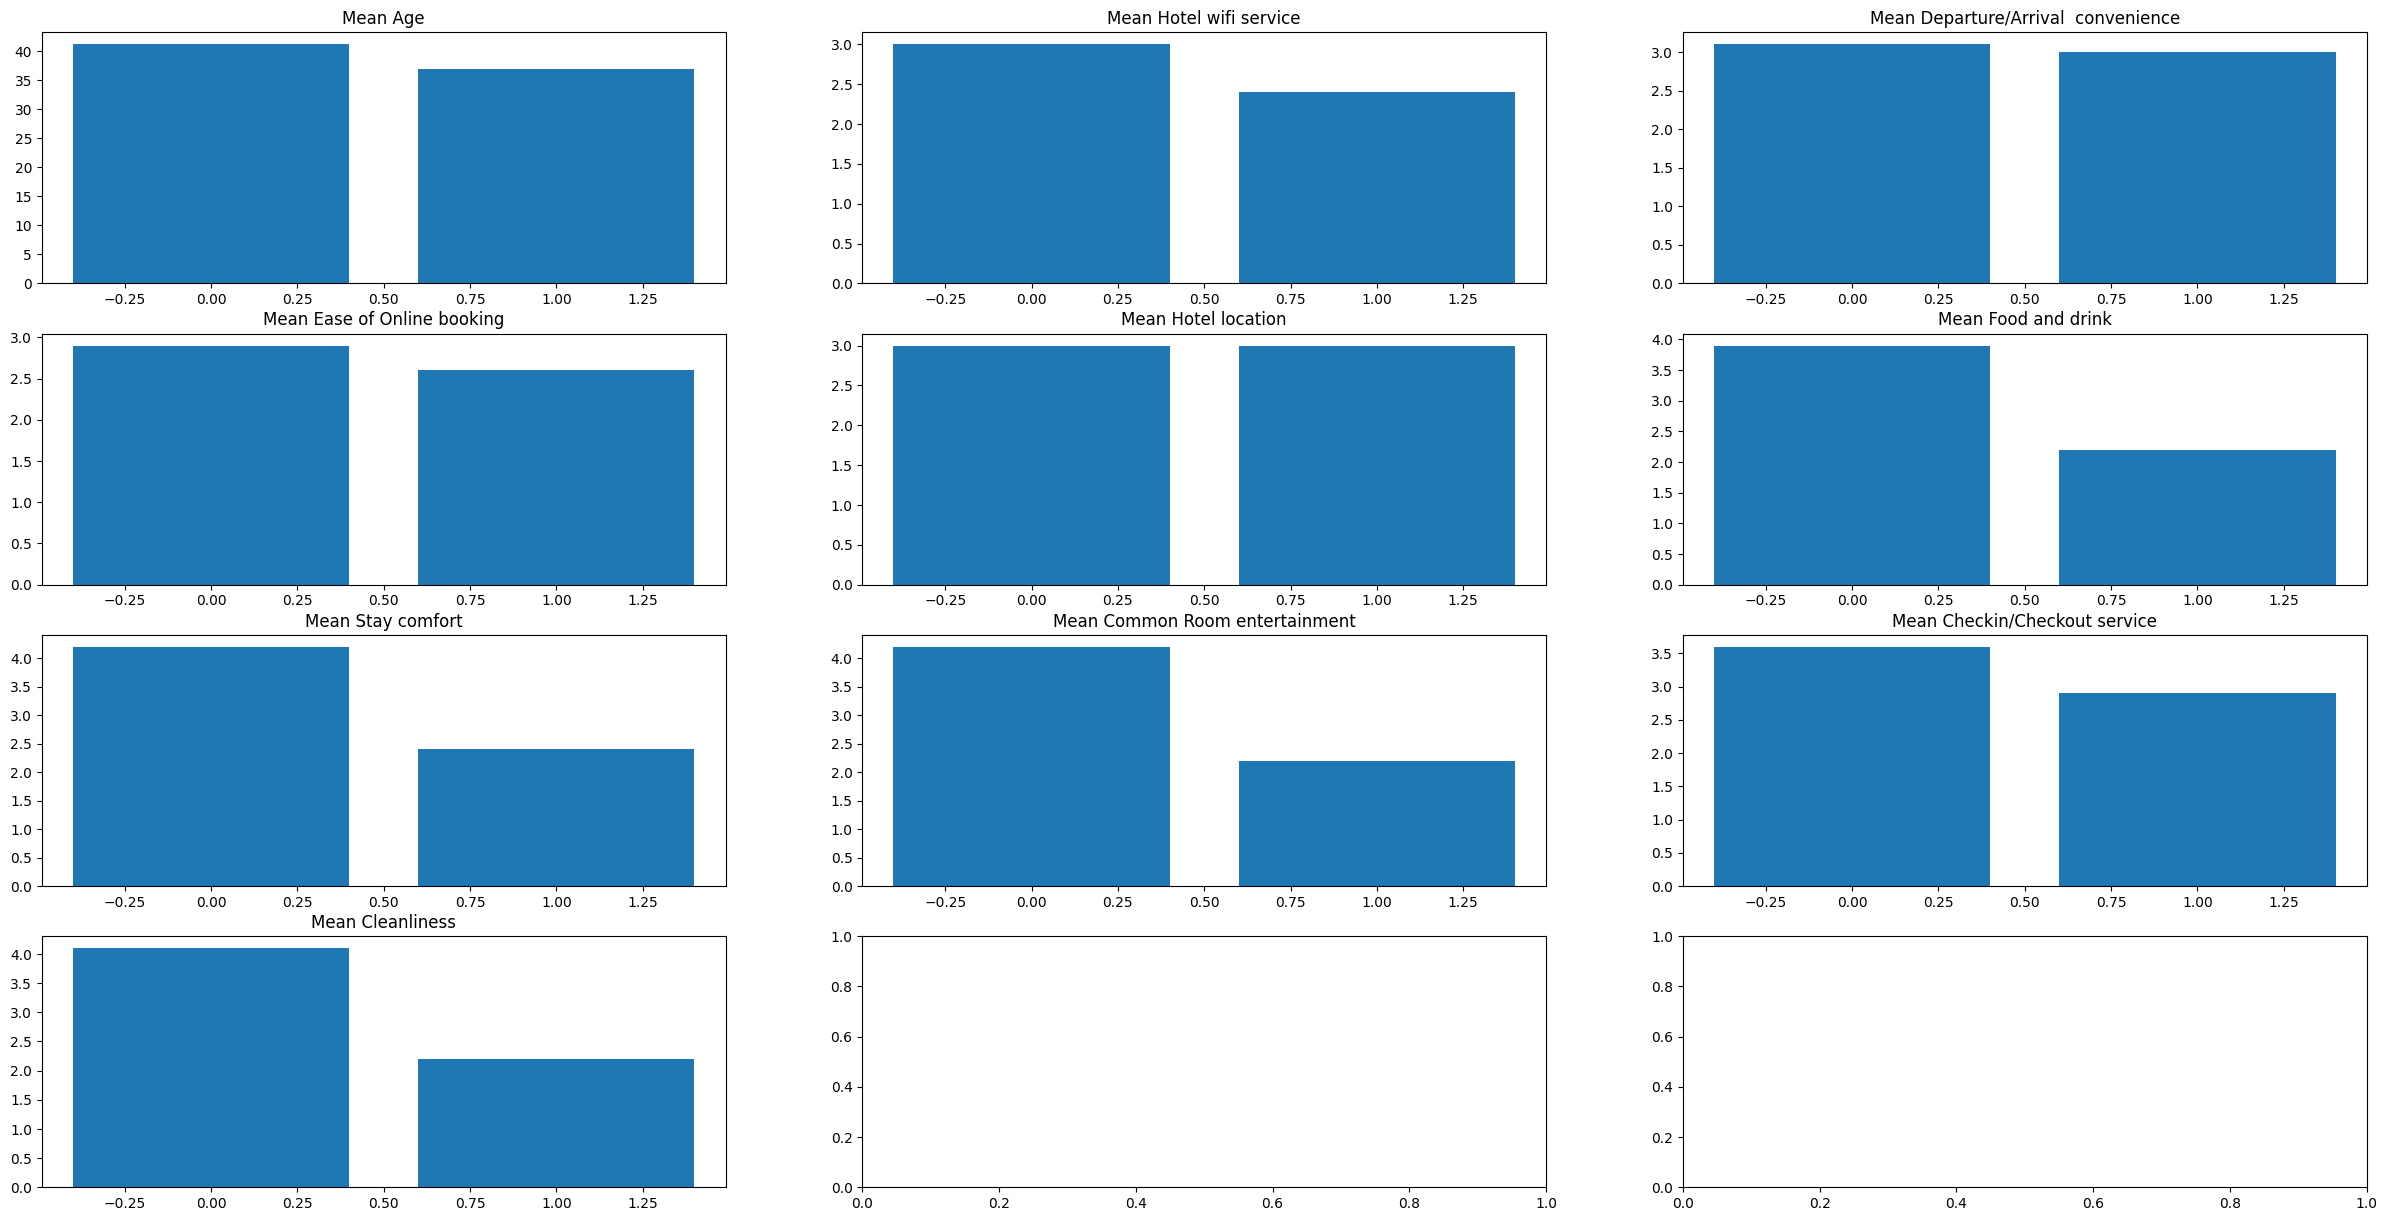

In [19]:
# Display the averages
fig, axes = plt.subplots(4,3, figsize = (30, 15))

axes = axes.ravel()
#Iterate over the columns and plot each one based on its average
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

This information about the averages of the clusters shows that there is not a great separation between each one, which reaffirms the bad data delivered by the previous models, not much can be inferred with the K means model

## Modelo DBSCAN

In [20]:
#we import the model
dbs = DBSCAN(eps=0.5, min_samples= 5)

dbs.fit(df_t)

df_2['cluster'] = dbs.labels_

In [21]:
cluster_groups = df_2.groupby('cluster', as_index=False).mean().round(1)
cluster_groups

C:\Users\simon\AppData\Local\Temp\ipykernel_5688\1508551019.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_groups = df_2.groupby('cluster', as_index=False).mean().round(1)


,cluster,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness
0,-1,39.8,2.7,3.0,2.7,3.0,3.2,3.4,3.3,3.3,3.3
1,0,27.1,2.0,2.0,2.0,2.0,5.0,5.0,5.0,4.0,5.0
2,1,27.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,1.0,2.0
3,2,27.9,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,4.0
4,3,27.7,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
833,832,39.8,4.0,2.0,2.0,2.0,4.0,4.0,4.0,2.0,4.0
834,833,41.6,3.0,3.0,3.0,3.0,5.0,4.0,4.0,5.0,3.0
835,834,50.4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
836,835,30.4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0


In [22]:
dbs = DBSCAN(eps=0.5, min_samples= 23)

dbs.fit(df_t)

df_2['cluster'] = dbs.labels_

In [24]:
cluster_groups_2 = df_2.groupby('cluster', as_index=False).mean().round(1)
cluster_groups_2

C:\Users\simon\AppData\Local\Temp\ipykernel_5688\1007565764.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_groups_2 = df_2.groupby('cluster', as_index=False).mean().round(1)


,cluster,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness
0,-1,39.4,2.7,3.0,2.8,3.0,3.2,3.5,3.4,3.3,3.3
1,0,28.4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0
2,1,28.4,5.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0


## Conclusion:

Two methods were evaluated to see if there were customer segments, we used the K means model and the DBSCAN model. Both models delivered very unfavorable metrics to find a possible clear segmentation. We conclude that with hotel satisfaction data we cannot segment an audience with these models.